# **Summary**

This research explores the evolution of attitudes and usage patterns related to technology, including the internet, data sharing, social media, and other digital technologies, to understand how they have changed with technological advancement. By examining variables such as weekly web usage hours ('wwwhr'), access to internet-enabled mobile devices at home ('webmob'), computer usage ('compuse'), interest in new technologies ('inttech'), and perceptions of technology's future opportunities ('nextgen'), we aimed to capture a comprehensive view of the technological landscape's transformation. Our methods involved analyzing these variables over time through various statistical visualizations, including scatter plots, kernel density estimates, histograms, and bar plots, to identify trends and shifts in technology interaction and perception.

The results reveal a significant increase in web usage from an average of about 3 hours per week in 2000 to nearly 16 hours by 2022, indicating greater integration of the internet into daily life. The adoption of internet-enabled mobile devices has shown a consistent rise, reflecting a shift towards mobile internet access. Computer usage has similarly grown, with a significant decrease in non-users, suggesting a broadening acceptance and integration of computer technology. Furthermore, a large majority of respondents displayed moderate to high interest in technological advancements and expressed optimism about the role of science and technology in creating future opportunities. This enthusiasm and positive outlook toward technology's potential highlight a societal shift towards embracing digital advancements.

In conclusion, our analysis provides compelling evidence of a marked positive evolution in technology usage and attitudes over time. This shift towards increased usage and optimistic perceptions of digital technology suggests a society that is not only adapting to but also engaging with the digital age, recognizing its potential to enhance human life. While our study has explored various aspects of technology's impact, it also opens avenues for future research into unexplored factors and the application of advanced analytical techniques, further contributing to our understanding of technology's role in societal evolution.


# **wwwhr and webmob**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Created an account and selected variables from the GSS explorer (https://gssdataexplorer.norc.org/variables/vfilter), then exported them into my own excel

# DATA CLEANING FOR WWWHR VARIABLE

data = pd.read_excel('./data/wwwhr.xlsx')
# print(data.head())
# print(data.describe())

codes_to_remove = ['.i:  Inapplicable', '.p:  Not applicable (I have not faced this decision)/Not imputable', '.d:  Do not Know/Cannot Choose', '.n:  No answer']

# Remove rows with the specified codes to get rid of unusable data
cleaned_data = data[~data['wwwhr'].isin(codes_to_remove)].copy()

# Replace "0 hours" with 0 and "168 hours" with 168
cleaned_data['wwwhr'] = cleaned_data['wwwhr'].replace("0 hours", 0)
cleaned_data['wwwhr'] = cleaned_data['wwwhr'].replace("168 hours", 168)

# Convert 'wwwhr' to numeric, making non-convertible values NaN
cleaned_data['wwwhr'] = pd.to_numeric(cleaned_data['wwwhr'], errors='coerce')

# Remove all rows with NaN values in 'wwwhr'
cleaned_data.dropna(subset=['wwwhr'], inplace=True)

print(cleaned_data.head())
print(cleaned_data.describe())


       year  id_  wwwhr
38116  2000    1    5.0
38119  2000    4    2.0
38120  2000    5    1.0
38122  2000    7    0.0
38124  2000    9    1.0
               year           id_         wwwhr
count  17186.000000  17186.000000  17186.000000
mean    2012.449901   1559.351682     11.127080
std        7.547115   1030.925901     15.244951
min     2000.000000      1.000000      0.000000
25%     2006.000000    721.000000      2.000000
50%     2014.000000   1446.000000      5.000000
75%     2021.000000   2216.000000     15.000000
max     2022.000000   4506.000000    168.000000


In [14]:
# Another approach to get the data is via fetching it from the parquet files

"""
The function below fetches and concatenates the three parquet dataset. This should
return the entire datast. In addition, it also creates a csv files that gets the
list of variables/features you want to save. Code retrieved from the get_gss.ipynb
file.

@output_filename : string that specifies the name of the output .csv file
@var_list: list of variables to save
"""
def fetch_gss_chunks(output_filename, var_list):
  # var_list = ['wrkstat', 'prestige'] # List of variables you want to save
  output_filename = output_filename + ".csv" # Name of the file you want to save the data to
  #
  modes = ['w','a'] # Has write mode and append mode
  phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
  #
  for k in range(3): # for each chunk of the data
      url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
      print(url) # Check the url is correct
      df = pd.read_parquet(url) # Download this chunk of data
      print(df.head()) # Visually inspect the first few rows
      df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode=modes[phase], # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
      phase = 1 # Switch from write mode to append mode

  return df


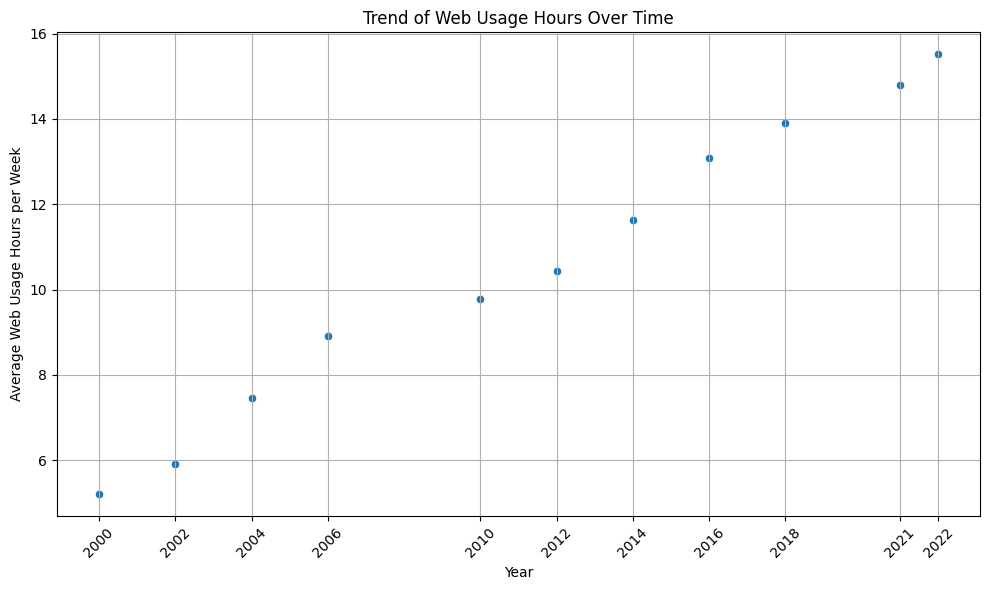

,year,wwwhr
0,2000,5.208417
1,2002,5.907878
2,2004,7.458554
3,2006,8.909548
4,2010,9.769524
5,2012,10.445535
6,2014,11.618299
7,2016,13.078135
8,2018,13.906021
9,2021,14.802514


In [15]:
# VISUALIZATION FOR WWWWHR VARIABLE
# We see average web usage increase each year, indicating a wider acceptance of technology/internet usage as time passes and technology advances.

# Calculate the average web usage hours per year
yearly_avg_hours = cleaned_data.groupby('year')['wwwhr'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=yearly_avg_hours, x='year', y='wwwhr')
plt.title('Trend of Web Usage Hours Over Time')
plt.xlabel('Year')
plt.ylabel('Average Web Usage Hours per Week')
plt.grid(True)
plt.xticks(yearly_avg_hours['year'].unique(), rotation=45)
plt.tight_layout()
plt.show()

yearly_avg_hours

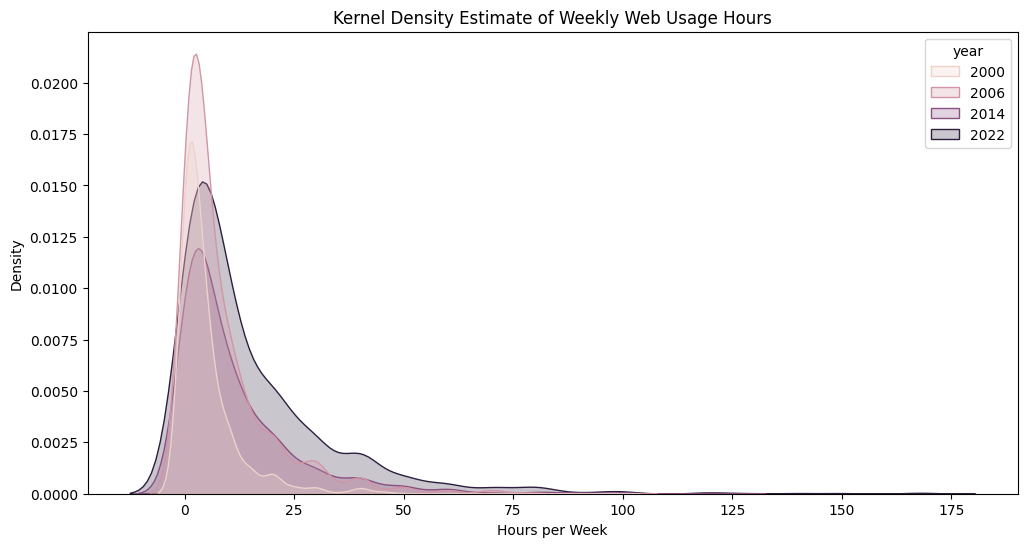

In [16]:
# With the KDE plot, we see a clear rightward shift in the peaks from 2000 to 2022. This indicates an overall increase in the number of hours spent on the web per week over time.
# It suggests that, on average, people are using the web more as the years progress. The width of the distributions seems to broaden slightly over time as well, indicating that
# the variability in web usage hours among individuals has increased.

# Filter the dataset for a few selected years for clarity
selected_years = cleaned_data[cleaned_data['year'].isin([2000, 2006, 2014, 2022])]

# Plotting
plt.figure(figsize=(12, 6))
sns.kdeplot(data=selected_years, x='wwwhr', hue='year', fill=True)
plt.title('Kernel Density Estimate of Weekly Web Usage Hours')
plt.xlabel('Hours per Week')
plt.ylabel('Density')
plt.show()

In [17]:
# DATA CLEANING FOR WEBMOB VARIABLE

data = pd.read_excel('./data/webmob.xlsx')
# print(data.head())
# print(data.describe())

codes_to_remove.extend(['.n:  No answer', '.d:  Do not Know/Cannot Choose', '.s:  Skipped on Web'])

# Remove rows with the specified codes to get rid of unusable data
cleaned_data = data[~data['webmob'].isin(codes_to_remove)].copy()

# print(cleaned_data.head())
# print(cleaned_data.describe())

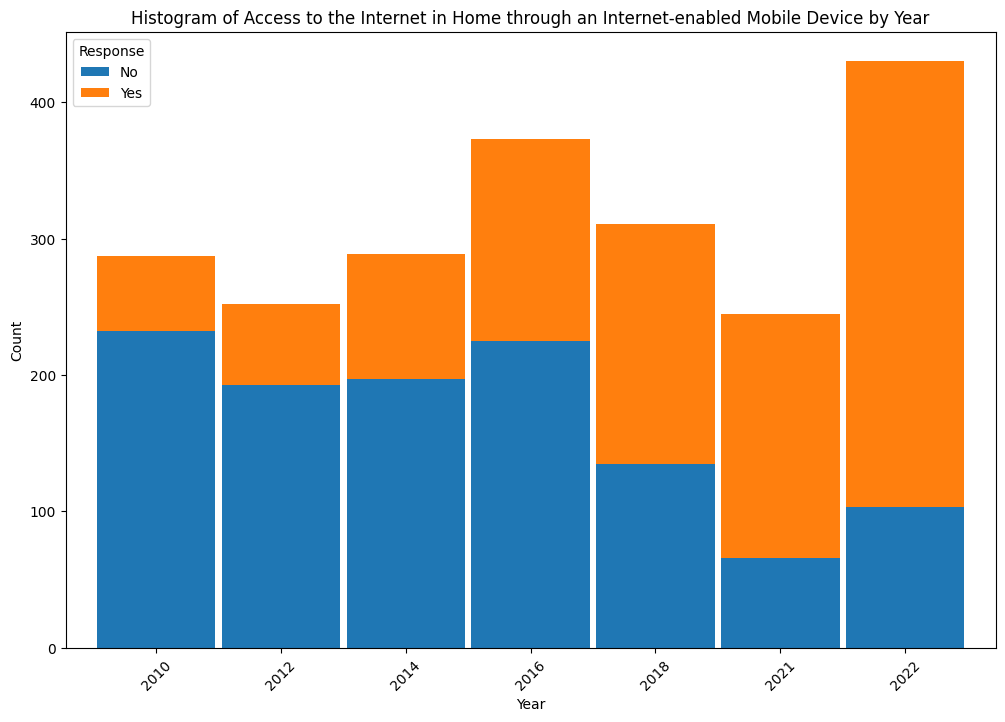

,Year,Total Responses
0,2010,287
1,2012,252
2,2014,289
3,2016,373
4,2018,311
5,2021,245
6,2022,430


In [18]:
# VISUALIZATION FOR WEBMOB VARIABLE
# Although the number of people polled varied each year, we see over the years that the proportion of people responding yes increased.
# Similarly, the amount of people responding no increased. This indicates that more people were gaining internet access in their homes through phones,
# indicating a positive relationship with technological advancement.

# Calculate the counts for each response per year.
response_counts_by_year = cleaned_data.groupby(['year', 'webmob']).size().unstack(fill_value=0)

response_counts_by_year.plot(kind='bar', stacked=True, figsize=(12, 8), width=0.95)
plt.title('Histogram of Access to the Internet in Home through an Internet-enabled Mobile Device by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Response')
plt.show()


total_responses_by_year = cleaned_data.groupby('year')['webmob'].count()
total_responses_by_year_df = total_responses_by_year.reset_index()
total_responses_by_year_df.columns = ['Year', 'Total Responses']
total_responses_by_year_df


In [19]:
# fetch the data
gss_dataset = fetch_gss_chunks("gss_dataset", ['wrkstat', 'prestige'])

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

# **Inttech**

In [20]:
variables_of_interest = ["inttech", "scifrom"]

inttech_scifrom_dataset = gss_dataset.loc[:, variables_of_interest]
print(inttech_scifrom_dataset.head)

<bound method NDFrame.head of       inttech       scifrom
0         NaN           NaN
1         NaN  the internet
2         NaN     magazines
3         NaN           NaN
4         NaN            tv
...       ...           ...
24125     NaN           NaN
24126     NaN           NaN
24127     NaN           NaN
24128     NaN           NaN
24129     NaN           NaN

[24130 rows x 2 columns]>


### **Inttech Feature**

In [21]:
#  inttech features processing
inttech_feature = inttech_scifrom_dataset["inttech"]

print(inttech_feature.shape)
print(inttech_feature.describe())
print(inttech_feature.unique())
print(inttech_feature.value_counts())

(24130,)
count                      8860
unique                        3
top       moderately interested
freq                       4161
Name: inttech, dtype: object
[NaN, 'very interested', 'not at all interested', 'moderately interested']
Categories (16, object): ['very interested', 'moderately interested', 'not at all interested',
                          'don't know', ..., 'uncodeable', 'not available in this release',
                          'not available in this year', 'see codebook']
moderately interested            4161
very interested                  3666
not at all interested            1033
don't know                          0
iap                                 0
I don't have a job                  0
dk, na, iap                         0
no answer                           0
not imputable_(2147483637)          0
not imputable_(2147483638)          0
refused                             0
skipped on web                      0
uncodeable                          0
not av

In [22]:
"""
This function is used to replace one value with another.

@datapoint : the value to test
@current : the value you want to replace
@new : the new value you want to replace the current value with
@keep : a boolean that determines if you want to replace your current value or
        keep your current value and replace everything else
"""

def replace_value(datapoint, current, new):

  for value in current:
    if datapoint == value:
      return new
  return datapoint

def replace_others(datapoint, current, new):
  for value in current:
    if datapoint != value:
      return new

  return datapoint

In [23]:
inttech_feature_cleaned = inttech_feature.apply(lambda x: replace_value(x, ["don't know", "iap", "I don't have a job", "dk, na, iap", "no answer",
                                                                            "not imputable_(2147483637)", "not imputable_(2147483638)", "refused", "skipped on web",
                                                                            "uncodeable", "not available in this release", "not available in this year",
                                                                            "see codebook"], "not applicable"))

In [24]:
print(inttech_feature_cleaned.value_counts())
print(inttech_feature_cleaned.unique())
print(inttech_feature_cleaned.shape)
print(inttech_feature_cleaned.isna().sum())

moderately interested    4161
very interested          3666
not at all interested    1033
Name: inttech, dtype: int64
[nan 'very interested' 'not at all interested' 'moderately interested']
(24130,)
15270


In [25]:
print(inttech_feature_cleaned.value_counts())
print(inttech_feature_cleaned.unique())

moderately interested    4161
very interested          3666
not at all interested    1033
Name: inttech, dtype: int64
[nan 'very interested' 'not at all interested' 'moderately interested']


In [26]:
inttech_feature_cleaned = inttech_feature_cleaned.replace(np.nan, "not applicable")

In [27]:
print(inttech_feature_cleaned.head())
print(inttech_feature_cleaned.value_counts())
print(inttech_feature_cleaned.unique())

0    not applicable
1    not applicable
2    not applicable
3    not applicable
4    not applicable
Name: inttech, dtype: object
not applicable           15270
moderately interested     4161
very interested           3666
not at all interested     1033
Name: inttech, dtype: int64
['not applicable' 'very interested' 'not at all interested'
 'moderately interested']


One of the biggest problems with this particular feature is that it has a lot of categories that do not make sense. So for the sake of simplifying our understanding and cleaning the data, I decided to replace all *non-informative* variables and missing values with **not applicable**. This should provide with a more standardized way of handling those types of situations.

Axes(0.125,0.11;0.775x0.77) 

not applicable           15270
moderately interested     4161
very interested           3666
not at all interested     1033
Name: inttech, dtype: int64 



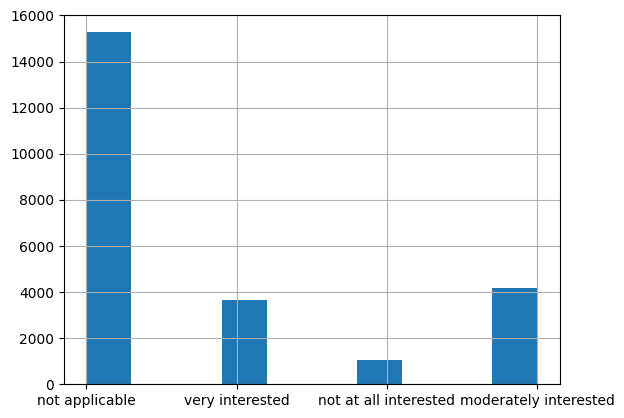

In [28]:
# visualize the data
print(inttech_feature_cleaned.hist(), "\n")
print(inttech_feature_cleaned.value_counts(), "\n")

<Axes: xlabel='inttech', ylabel='Count'>

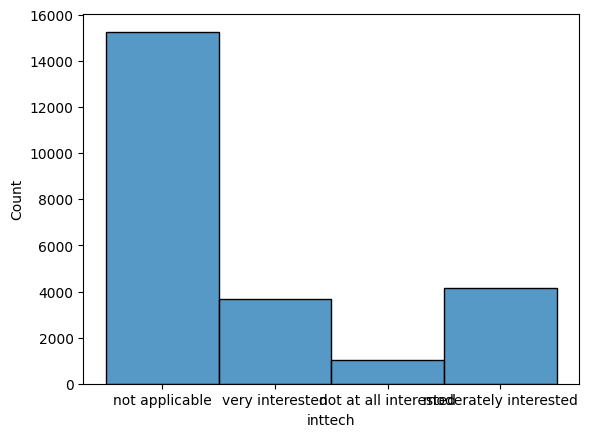

In [29]:
sns.histplot(inttech_feature_cleaned)

It seems as if the largest count happens to be **not applicable** by a large margin. This could mean that the surveyees either did not respond, could not choose, or something the question was skipped. Of all the people who did respond, it seems as if most people are interested in technology.

# **Usewww and Compuse - Ali**
usewww - "Other than for e-mail, do you ever use the Internet or World Wide Web? (considered the same)"

compuse - "Do you personally ever use a computer at home, at work, or at some other location?"

In [38]:
def fetch_gss_chunks(output_filename, var_list):
  #var_list = ['wrkstat', 'prestige'] # List of variables you want to save
  output_filename = output_filename + ".csv" # Name of the file you want to save the data to
  #
  modes = ['w','a'] # Has write mode and append mode
  phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
  #
  for k in range(3): # for each chunk of the data
      url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
      print(url) # Check the url is correct
      df = pd.read_parquet(url) # Download this chunk of data
      print(df.head()) # Visually inspect the first few rows
      df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode=modes[phase], # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
      phase = 1 # Switch from write mode to append mode

  return df

In [39]:
#fetch needed GSS data data
df = fetch_gss_chunks('GSS', ['year', 'id', 'compuse','usewww'])

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [40]:
gss = pd.read_csv('GSS.csv') #make a dataframe from the new csv of data
gss

,year,id,compuse,usewww
0,1972,1,NaN,NaN
1,1972,2,NaN,NaN
2,1972,3,NaN,NaN
3,1972,4,NaN,NaN
4,1972,5,NaN,NaN
...,...,...,...,...
72387,2022,3541,yes,NaN
72388,2022,3542,yes,NaN
72389,2022,3543,yes,NaN
72390,2022,3544,NaN,NaN


In [41]:
#DATA CLEANING FOR USEWWW AND COMPUSE VARIABLES

#remove years question was not asked: 1972-98, 2006-08
gss = gss.iloc[38117:,:] #1972-98
gss = gss.reset_index(drop=True)

gss = pd.concat([gss.iloc[1:8394, :], gss.iloc[14928:,:]], ignore_index=True)
gss = gss.reset_index(drop=True)

#handle missing data
#doing only one type: not answered/applicable (NA)
gss = gss.replace(np.nan, 'NA')
gss

,year,id,compuse,usewww
0,2000,2,yes,no
1,2000,3,no,NA
2,2000,4,yes,yes
3,2000,5,yes,yes
4,2000,6,NA,NA
...,...,...,...,...
27735,2022,3541,yes,NA
27736,2022,3542,yes,NA
27737,2022,3543,yes,NA
27738,2022,3544,NA,NA


    year response  count
0   2000       NA    464
1   2002       NA     17
2   2004       NA   1834
3   2010       NA    615
4   2012       NA    675
5   2014       NA    865
6   2016       NA    982
7   2018       NA    789
8   2021       NA   1381
9   2022       NA   1182
10  2000       no    993
11  2002       no    913
12  2004       no    255
13  2010       no    288
14  2012       no    253
15  2014       no    289
16  2016       no    374
17  2018       no    312
18  2021       no    245
19  2022       no    430
20  2000      yes   1359
21  2002      yes   1835
22  2004      yes    723
23  2010      yes   1141
24  2012      yes   1046
25  2014      yes   1384
26  2016      yes   1511
27  2018      yes   1247
28  2021      yes   2406
29  2022      yes   1932


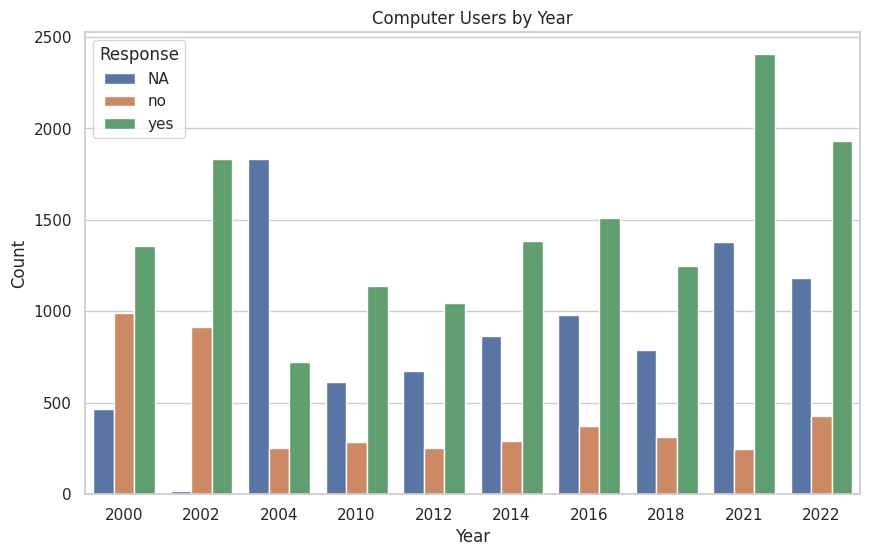

In [42]:
#VISUALIZATION FOR COMPUSE VARIABLE

compuse = gss.loc[:,'year':'compuse'] #separate the compuse data

#group the responses by year
yearly_totals = compuse.groupby('year')['compuse'].value_counts().unstack(fill_value=0).reset_index()

#melt the data to get counts of yes, no, and na
yearly_totals = yearly_totals.melt(id_vars='year', var_name='response', value_name='count')
print(yearly_totals)

# Bar plot - here we see the number of computer users increasing from year to year and
#the 'no' response decreasing relative to the 'yes' response
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.set(style="whitegrid")
sns.barplot(x='year', y='count',hue = 'response', data=yearly_totals)
plt.title('Computer Users by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Response')
plt.show()

[42.21938776 33.22416303 26.07361963 20.15395381 19.4765204  17.27435744
 19.84084881 20.01282874  9.24179555 18.20491109]


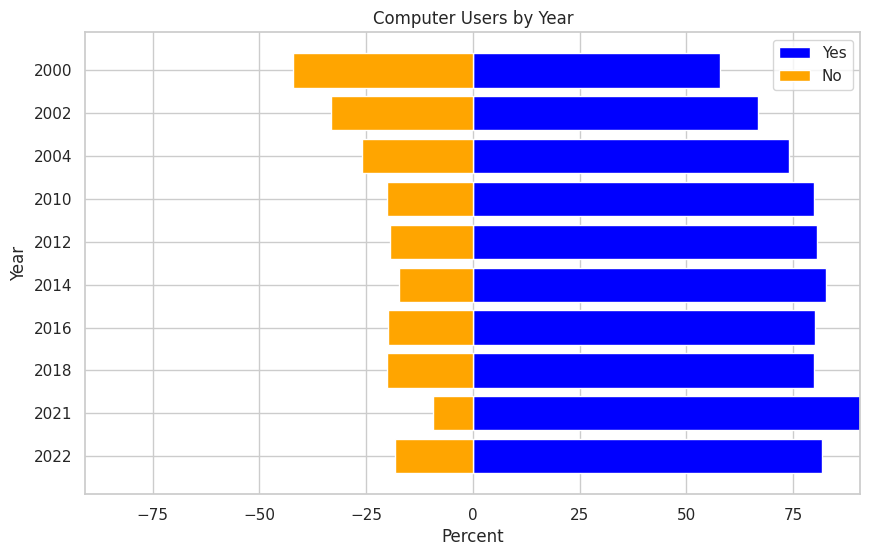

In [43]:
#buttefly plot - this plot makes the relative yes/no data to each other more clear.
#We can see that the percentage of non-users quickly declined from ~40% after 2000
#and has remained steady around 10-20%


years = yearly_totals.loc[0:9,'year'].reset_index().to_numpy()[:,1]
#print(years)
yes = yearly_totals.loc[20:,'count'].reset_index().to_numpy()[:,1].astype(float)
#print(yes)
no = yearly_totals.loc[10:19,'count'].reset_index().to_numpy()[:,1].astype(float)
#print(no)

#convert to pct
for i in range(len(yes)):
  tot = yes[i] + no[i]
  yes[i] = yes[i]/tot * 100
  no[i] = no[i]/tot * 100

#print(yes)
print(no)

no = -no

# Plotting the butterfly chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot positive values
ax.barh(years, yes, color='blue', label='Yes', align = 'center')

# Plot negative values
ax.barh(years, no, color='orange', label='No', align = 'center')

# Set labels, title, and legend
ax.set_title('Computer Users by Year')
ax.set_ylabel('Year')
ax.set_xlabel('Percent')
ax.legend()

ax.invert_yaxis()

ax.set_xlim(-yes.max(), yes.max())

plt.show()

    year response  count
0   2000       NA   1478
1   2002       NA    861
2   2004       NA   2089
3   2010       NA   1602
4   2012       NA   1581
5   2014       NA   2320
6   2016       NA   2639
7   2018       NA   2162
8   2021       NA   3930
9   2022       NA   3268
10  2000       no    339
11  2002       no    261
12  2004       no     39
13  2010       no    314
14  2012       no    255
15  2014       no     66
16  2016       no     70
17  2018       no     57
18  2021       no     18
19  2022       no     53
20  2000      yes    999
21  2002      yes   1643
22  2004      yes    684
23  2010      yes    128
24  2012      yes    138
25  2014      yes    152
26  2016      yes    158
27  2018      yes    129
28  2021      yes     84
29  2022      yes    223


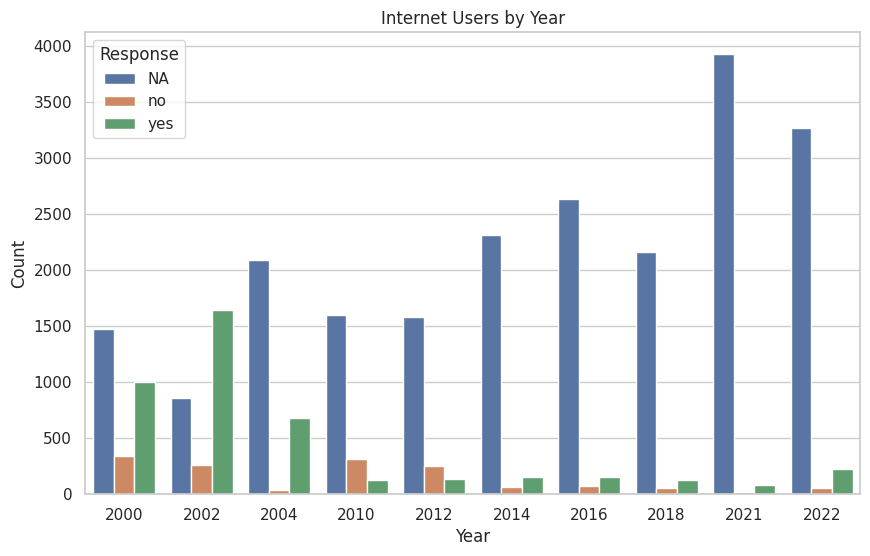

In [44]:
#VISUALIZATION FOR USEWWW VARIABLE
#interestingly enough, it can be seen that most responses to this question about
#using the internet or not is missing (the respondents declined to answer).
#For this reason, normalizing the data and making a butterfly chart may be more
#beneficial

usewww = gss.loc[:,'year':'usewww']

yearly_use = usewww.groupby('year')['usewww'].value_counts().unstack(fill_value=0).reset_index()

yearly_use = yearly_use.melt(id_vars='year', var_name='response', value_name='count')
print(yearly_use)

# Bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.set(style="whitegrid")
sns.barplot(x='year', y='count',hue = 'response', data=yearly_use)
plt.title('Internet Users by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Response')
plt.show()

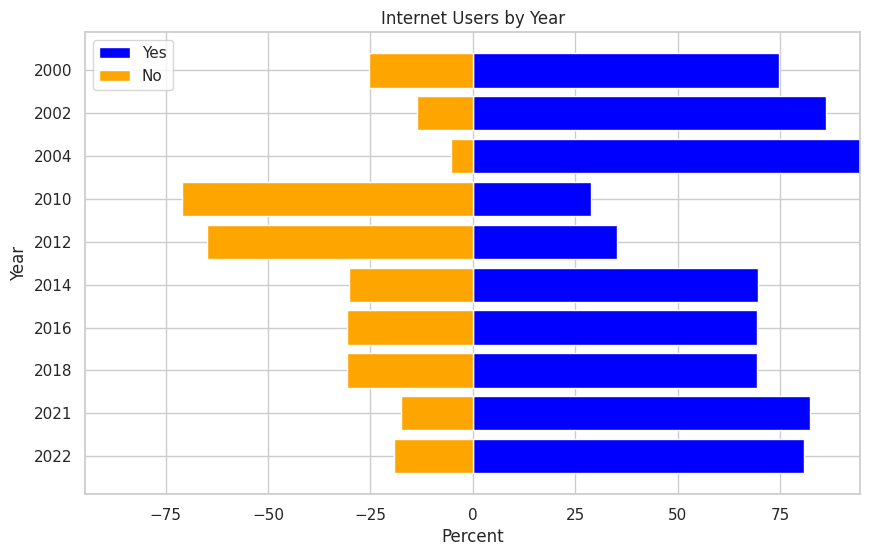

In [45]:
#buttefly plot - it can be seen that there is no set trend in internet use over
#the last two decades. However, it can be inferred that the data in 2010 and 2012
#is an anamoly under the assumption that internet use and computer use increase
#together. Thus, internet users have steadily remained in the 70-80% range over the years.
#however, more research on the GSS and historical context needs to be done to examine
#why there is so much missing data and a lack of a pattern in the usewww variable.

years = yearly_use.loc[0:9,'year'].reset_index().to_numpy()[:,1]
yes = yearly_use.loc[20:,'count'].reset_index().to_numpy()[:,1].astype(float)
no = yearly_use.loc[10:19,'count'].reset_index().to_numpy()[:,1].astype(float)

#convert to pct
for i in range(len(yes)):
  tot = yes[i] + no[i]
  yes[i] = yes[i]/tot * 100
  no[i] = no[i]/tot * 100

no = -no

# Plotting the butterfly chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot positive values
ax.barh(years, yes, color='blue', label='Yes', align = 'center')

# Plot negative values
ax.barh(years, no, color='orange', label='No', align = 'center')

# Set labels, title, and legend
ax.set_title('Internet Users by Year')
ax.set_ylabel('Year')
ax.set_xlabel('Percent')
ax.legend()

ax.invert_yaxis()

ax.set_xlim(-yes.max(), yes.max())

plt.show()

# **emailmin and nextgen**

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
#
var_list = ['year', 'nextgen', 'emailmin'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 1: # Added to make sure header not added multiple times to csv
      df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                          mode=modes[phase], # control write versus append
                          header=False, # variable names
                          index=False) # no row index saved
    else:
      df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode=modes[phase], # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

The variables to be analyzed are emailmin (About how many minutes or hours per week do you spend sending and answering electronic mail or e-mail?) and nextgen (Because of science and technology, there will be more opportunities for the next generation?).

In [47]:
df2 = pd.read_csv('selected_gss_data.csv')
df2.head()

,year,nextgen,emailmin
0,1972,NaN,NaN
1,1972,NaN,NaN
2,1972,NaN,NaN
3,1972,NaN,NaN
4,1972,NaN,NaN


In [48]:
emailmin = df2[["year", "emailmin"]]
emailmin.shape

(72390, 2)

In [49]:
nextgen = df2[["year", "nextgen"]]
nextgen.shape

(72390, 2)

The variables were first split to be analyzed in independence/to see the data over time. The variables will be analyzed against each other later.

In [50]:
emailmin['emailmin'].value_counts().sort_index()

0.0     10291
1.0        43
2.0        46
3.0        13
4.0        11
5.0       209
6.0         7
7.0         5
8.0         3
10.0      352
12.0        5
14.0        1
15.0      263
16.0        2
17.0        2
20.0      238
22.0        2
23.0        1
24.0        1
25.0       20
26.0        1
29.0        2
30.0     1269
33.0        1
35.0       13
36.0        2
38.0        2
40.0       45
44.0        3
45.0       99
48.0        1
50.0       21
52.0        1
53.0        1
55.0        1
57.0        1
58.0        1
59.0        4
Name: emailmin, dtype: int64

In [51]:
total = emailmin['emailmin'].value_counts().sum()
print(total)

12983


In [52]:
nan_count = emailmin['emailmin'].isna().sum()
print(nan_count)

59407


In [53]:
emailmin_values = emailmin.dropna(subset=["emailmin"])
emailmin_values.head()

,year,emailmin
38116,2000,0.0
38117,2000,0.0
38119,2000,0.0
38120,2000,0.0
38122,2000,30.0


In order to clean the data, we decided to drop any NaN values. The data didn't have to be cleaned further, as the parquet method already accounted for error code values and marked them as NaN.

In [54]:
emailmin_values.shape

(12983, 2)

In [55]:
emailmin_values['emailmin'].describe()

count    12983.000000
mean         4.706616
std         10.583426
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         59.000000
Name: emailmin, dtype: float64

We can see that the data is extremely skewed due to the heavy amount of 0. We will deal with this later.

<Axes: ylabel='emailmin'>

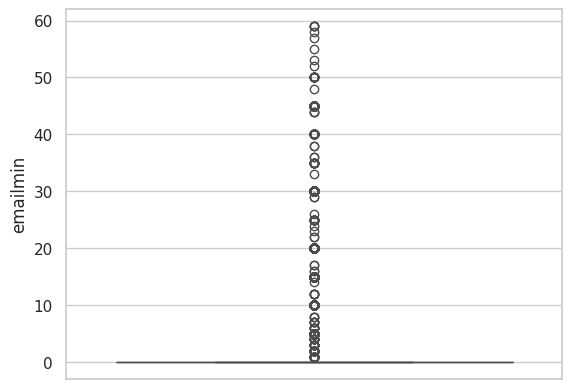

In [56]:
sns.boxplot(emailmin_values['emailmin'])

Again, we can see that techincally, all of the data which isn't at 0 is an outlier.

<Axes: xlabel='emailmin', ylabel='Density'>

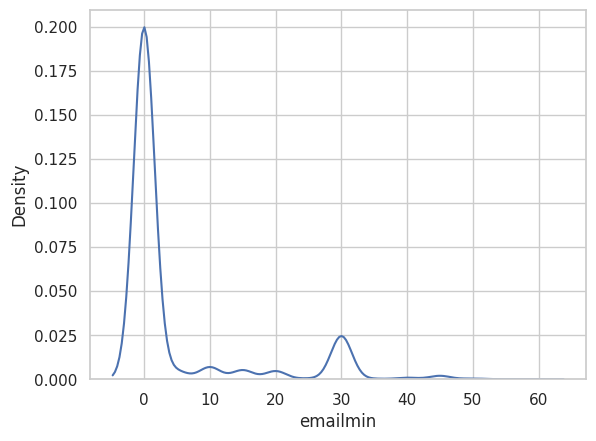

In [57]:
sns.kdeplot(data=emailmin_values,x='emailmin')

We see from the kernel density plot that the data is bimodal, one large peak at 0 minutes and the other at 30 mins. This could be due to people choosing the most common numbers which come to their mind.

<Axes: xlabel='year', ylabel='emailmin'>

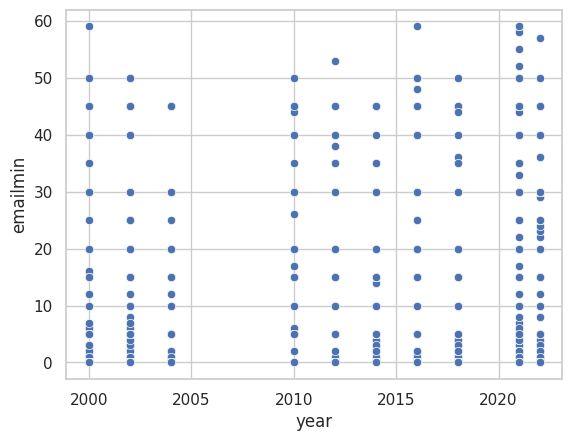

In [58]:
sns.scatterplot(data=emailmin_values,x="year", y="emailmin")

We can see that there is no real pattern in the responses over the years.

In [59]:
emailmin_values_no0 = emailmin_values[emailmin_values.emailmin != 0]
emailmin_values_no0.head()

,year,emailmin
38122,2000,30.0
38125,2000,10.0
38129,2000,10.0
38136,2000,30.0
38139,2000,30.0


In order to make the data more evenly distributed, all responses with zero were removed.

In [60]:
emailmin_values_no0.shape

(2692, 2)

In [61]:
emailmin_values_no0['emailmin'].describe()

count    2692.000000
mean       22.699108
std        11.480037
min         1.000000
25%        10.000000
50%        30.000000
75%        30.000000
max        59.000000
Name: emailmin, dtype: float64

We can see that the data is far more balanced and will allow for a better comparison among values that are not 0.

<Axes: ylabel='emailmin'>

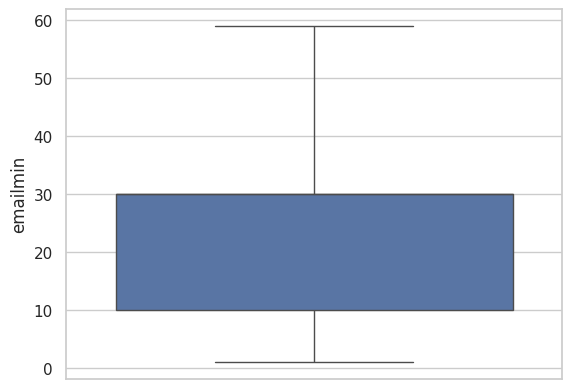

In [62]:
sns.boxplot(emailmin_values_no0['emailmin'])

<Axes: xlabel='emailmin', ylabel='Density'>

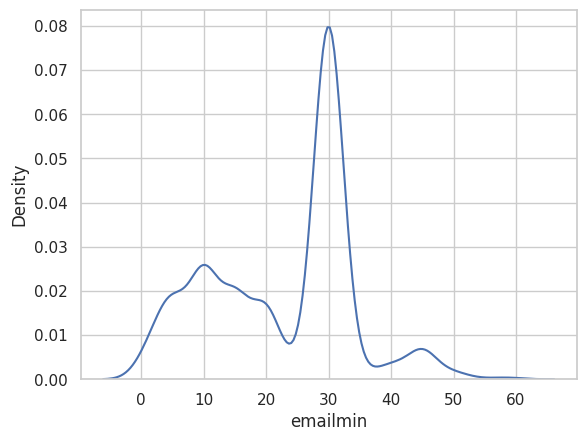

In [63]:
sns.kdeplot(data=emailmin_values_no0,x='emailmin')

This new kernel density plot reveals another two peaks (one at 10 minutes and the other at 45 minutes).

<Axes: xlabel='year', ylabel='emailmin'>

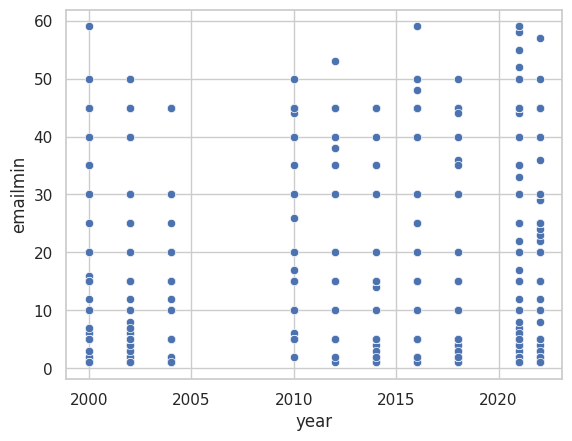

In [64]:
sns.scatterplot(data=emailmin_values_no0,x="year", y="emailmin")

The scatterplot, however, does not change. This is to be expected, as the general trend of data does not change by removing a single value.

In [65]:
nextgen['nextgen'].value_counts()

agree                6262
strongly agree       4422
disagree              941
strongly disagree     149
Name: nextgen, dtype: int64

In [66]:
total = nextgen['nextgen'].value_counts().sum()
print(total)

11774


In [67]:
nan_count = nextgen['nextgen'].isna().sum()
print(nan_count)

60616


In [68]:
nextgen_values = nextgen.dropna(subset=["nextgen"])
nextgen_values.head()

,year,nextgen
46510,2006,agree
46511,2006,strongly agree
46515,2006,strongly agree
46516,2006,agree
46518,2006,agree


Again, as we did with emailmin, we remove all NaN values as part of the cleaning. Furthermore, the data from the paraquet method does not contain error codes.

In [69]:
nextgen_values.shape

(11774, 2)

<Axes: xlabel='nextgen', ylabel='Count'>

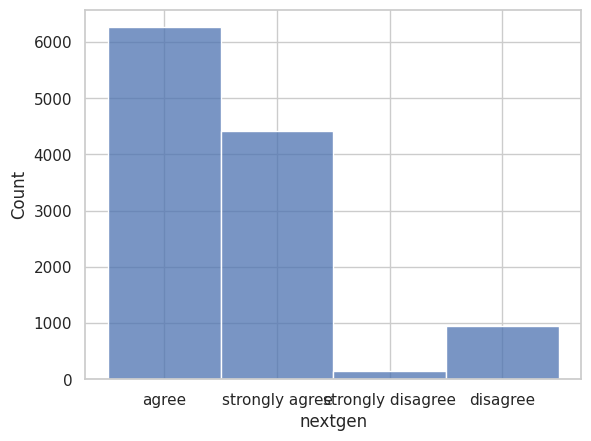

In [70]:
sns.histplot(nextgen_values['nextgen'])

We can see that there is a general trend of agreeing that there will be more opportunities in the future due to technology.

In [71]:
aggregated_data = nextgen_values.groupby(['year', 'nextgen']).size().reset_index(name='counts')
aggregated_data.head()

,year,nextgen,counts
0,2006,agree,931
1,2006,disagree,129
2,2006,strongly agree,750
3,2006,strongly disagree,19
4,2008,agree,787


We will now try to visualize the data over time by grouping. Each reponse category in nextgen will be counted per year.

<Axes: xlabel='year', ylabel='counts'>

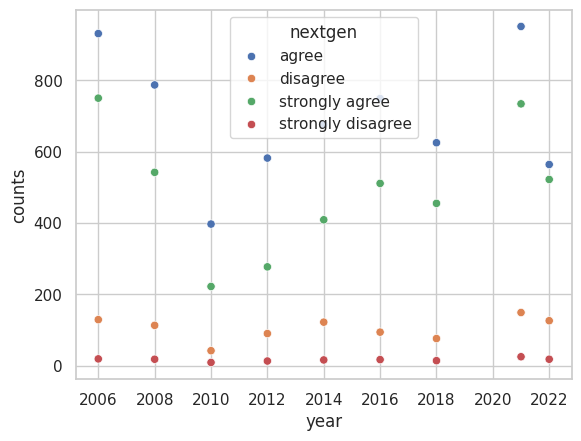

In [72]:
sns.scatterplot(data=aggregated_data, x='year', y='counts', hue='nextgen')

We can see that while there is no real trend in both disagree and strongly disagree, both agree and strongly agree tend to increase past 2010.

In [73]:
combined_df = df2.copy()
combined_df.head()

,year,nextgen,emailmin
0,1972,NaN,NaN
1,1972,NaN,NaN
2,1972,NaN,NaN
3,1972,NaN,NaN
4,1972,NaN,NaN


In [74]:
pd.crosstab(combined_df['emailmin'],combined_df['nextgen'])

nextgen,agree,disagree,strongly agree,strongly disagree
emailmin,,,,
0.0,1905,271,1381,46
1.0,5,2,6,0
2.0,7,3,5,0
3.0,2,0,2,0
4.0,5,1,1,0
5.0,33,8,15,2
7.0,0,0,1,0
8.0,1,0,0,0
10.0,63,13,39,2


The crosstab doesn't really give us much insight into whether there is a direct correlation between nextgen and emailmin.

<Axes: xlabel='year', ylabel='emailmin'>

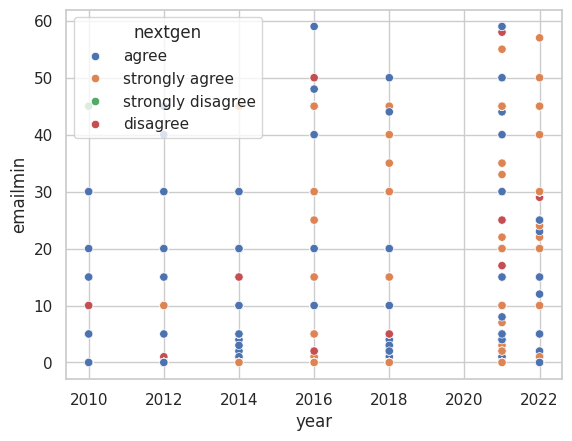

In [75]:
sns.scatterplot(data=combined_df, x="year", y="emailmin", hue="nextgen")

In [76]:
combined_df_emailv = combined_df.dropna(subset=["emailmin"])

In [77]:
combined_df_emailv['nextgen'].fillna("No data", inplace=True)
combined_df_emailv.shape

<ipython-input-77-06d839eabc5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_emailv['nextgen'].fillna("No data", inplace=True)


(12983, 3)

<Axes: xlabel='emailmin', ylabel='Density'>

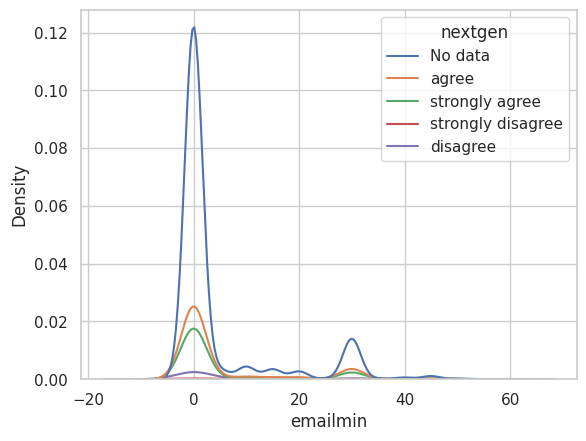

In [78]:
sns.kdeplot(data=combined_df_emailv, x="emailmin", hue="nextgen")

In [79]:
combined_df_emailv_genv = combined_df.dropna(subset = ["nextgen", "emailmin"])
combined_df_emailv_genv.shape

(4574, 3)

<Axes: xlabel='emailmin', ylabel='Density'>

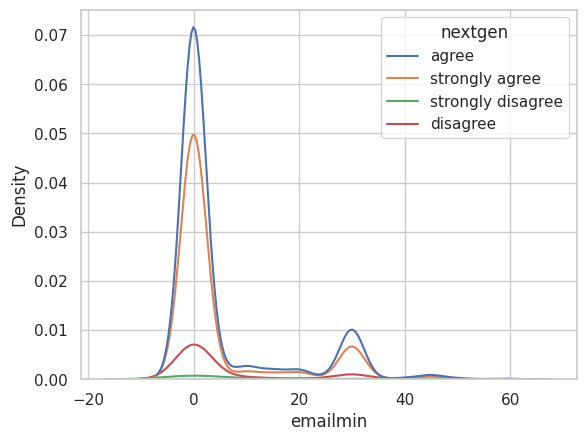

In [80]:
sns.kdeplot(data=combined_df_emailv_genv, x="emailmin", hue="nextgen")

# **Conclusion**

In order to investigate a pattern between various factors such as attitude/usage of technology, internet, data sharing, social media, and other related topics with respect to the evolution and advancement of digital technology, multiple variables were explored and visualized in hopes of gaining insight about useful patterns. Investigating the ’wwwhr’ and ‘webmob’ indicates an increase in the accessibility of the internet and its usage in later years. The ‘inttech’ and ‘scifrom’ suggests that those who are more interested in technology tend to use the internet as their source of information as opposed to other sources. The ‘usewww’ and ‘compuse’ variable indicates an increase of computer users and a high percentage of internet users over time. Investigating the ‘emailmin’ and ‘nextgen’ variables indicate that there are people who either do not really look at their emails or people who spend about half an hour looking at emails. In addition, the analysis on the ‘nextgen’ variable seems to indicate that most people think that there are more opportunities in the future. Ultimately, investigating all the features suggests that the various factors regarding technology do evolve with the advancement of technology because the usage, interest, attitude, and accessibility of technology seems to increase over time. Although many features were analyzed and visualized, there are still plenty of other factors that were not taken into account such as computer data threat. In addition, this project leaves room for potential future work such as investigating further into the historical context of various features and the reasoning behind missing data and the lack of patterns. Another potential future work includes inferencing using machine learning algorithms and other techniques. Ultimately, this project aims to investigate the evolution of various factors such as attitude, accessibility, usage, and others towards technology as technology advances in hopes that there is more awareness of how the advancement of technology affects society and each individual’s daily lives.

# **Appendix**

## **Appendix A: scifrom**

### **Scifrom Dataset**

In [ ]:
scifrom_feature = inttech_scifrom_dataset["scifrom"]

print(scifrom_feature.shape)
print(scifrom_feature.describe())
print(scifrom_feature.unique())
print(scifrom_feature.value_counts())

(24130,)
count             7694
unique              11
top       the internet
freq              3024
Name: scifrom, dtype: object
[NaN, 'the internet', 'magazines', 'tv', 'family', ..., 'friends/colleagues', 'radio', 'other', 'government agencies', 'ted talks']
Length: 12
Categories (24, object): ['newspapers', 'magazines', 'the internet',
                          'books/other printed material', ..., 'uncodeable', 'not available in this release',
                          'not available in this year', 'see codebook']
the internet                     3024
tv                               2607
magazines                         607
newspapers                        547
books/other printed material      354
radio                             168
family                            154
friends/colleagues                151
other                              66
government agencies                15
ted talks                           1
not imputable_(2147483638)          0
not available in thi

In [ ]:
scifrom_feature_cleaned = scifrom_feature.apply(lambda z: replace_value(z, ["not imputable_(2147483638)", "not available in this year",
                                                                            "not available in this release", "uncodeable", "skipped on web",
                                                                            "refused", "iap", "not imputable_(2147483637)", "no answer", "dk, na, iap",
                                                                            "I don't have a job", "don't know", "see codebook"], "not applicable"))

In [ ]:
scifrom_feature_cleaned = scifrom_feature_cleaned.replace(np.nan, "not applicable")

print(scifrom_feature_cleaned.shape)
print(scifrom_feature_cleaned.describe())
print(scifrom_feature_cleaned.unique())
print(scifrom_feature_cleaned.value_counts())

(24130,)
count              24130
unique                12
top       not applicable
freq               16436
Name: scifrom, dtype: object
['not applicable' 'the internet' 'magazines' 'tv' 'family'
 'books/other printed material' 'newspapers' 'friends/colleagues' 'radio'
 'other' 'government agencies' 'ted talks']
not applicable                  16436
the internet                     3024
tv                               2607
magazines                         607
newspapers                        547
books/other printed material      354
radio                             168
family                            154
friends/colleagues                151
other                              66
government agencies                15
ted talks                           1
Name: scifrom, dtype: int64


<ipython-input-33-266f39e214ef>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  scifrom_histplot.set_xticklabels(scifrom_histplot.get_xticklabels(), rotation = 90)


[Text(0, 0, 'not applicable'),
 Text(1, 0, 'the internet'),
 Text(2, 0, 'magazines'),
 Text(3, 0, 'tv'),
 Text(4, 0, 'family'),
 Text(5, 0, 'books/other printed material'),
 Text(6, 0, 'newspapers'),
 Text(7, 0, 'friends/colleagues'),
 Text(8, 0, 'radio'),
 Text(9, 0, 'other'),
 Text(10, 0, 'government agencies'),
 Text(11, 0, 'ted talks')]

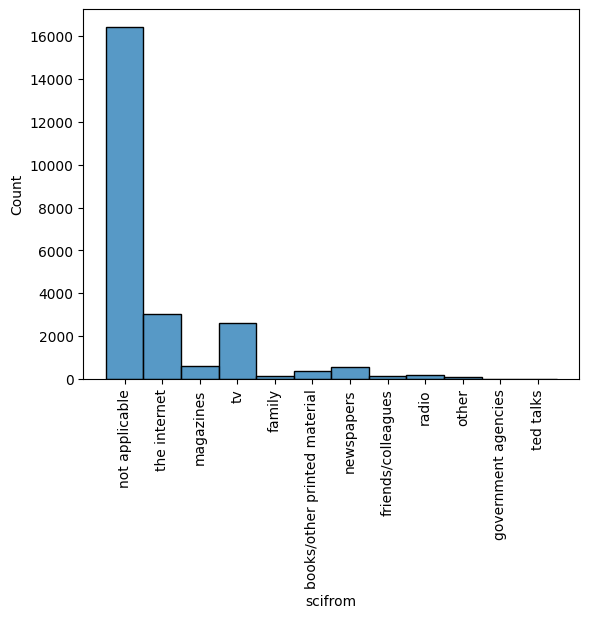

In [ ]:
scifrom_histplot = sns.histplot(scifrom_feature_cleaned)
scifrom_histplot.set_xticklabels(scifrom_histplot.get_xticklabels(), rotation = 90)

It seems as if the largest count happens to be **not applicable** by a large margin just like the **inttech** dataset. This could mean that the surveyees either did not respond, could not choose, or something the question was skipped. This does not surprise me. It seems as if of all people who answered, the most popular sources of information is from **the internet*** or **tv**. This makes sense since **the internet** and **tv** are the most readily available and provide the most information the quickest.

### **Combination of Both**

In [ ]:
inttech_scifrom_cleaned = pd.DataFrame(columns = ["inttech", "scifrom"])
inttech_scifrom_cleaned["inttech"] = inttech_feature_cleaned
inttech_scifrom_cleaned["scifrom"] = scifrom_feature_cleaned

inttech_scifrom_cleaned.head()

,inttech,scifrom
0,not applicable,not applicable
1,not applicable,the internet
2,not applicable,magazines
3,not applicable,not applicable
4,not applicable,tv


In [ ]:
crosstab = pd.crosstab(inttech_scifrom_cleaned["inttech"], inttech_scifrom_cleaned["scifrom"])
print(crosstab)

scifrom                books/other printed material  family  \
inttech                                                       
moderately interested                            93      65   
not applicable                                  107      26   
not at all interested                            24      34   
very interested                                 130      29   

scifrom                friends/colleagues  government agencies  magazines  \
inttech                                                                     
moderately interested                  63                    5        211   
not applicable                         23                    3        138   
not at all interested                  25                    1         37   
very interested                        40                    6        221   

scifrom                newspapers  not applicable  other  radio  ted talks  \
inttech                                                                      
mo

<ipython-input-36-5a0db4820b7e>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  very_interested_histplot.set_xticklabels(very_interested_histplot.get_xticklabels(), rotation = 90)


[Text(0, 0, 'magazines'),
 Text(1, 0, 'newspapers'),
 Text(2, 0, 'the internet'),
 Text(3, 0, 'tv'),
 Text(4, 0, 'books/other printed material'),
 Text(5, 0, 'friends/colleagues'),
 Text(6, 0, 'radio'),
 Text(7, 0, 'not applicable'),
 Text(8, 0, 'family'),
 Text(9, 0, 'other'),
 Text(10, 0, 'government agencies'),
 Text(11, 0, 'ted talks')]

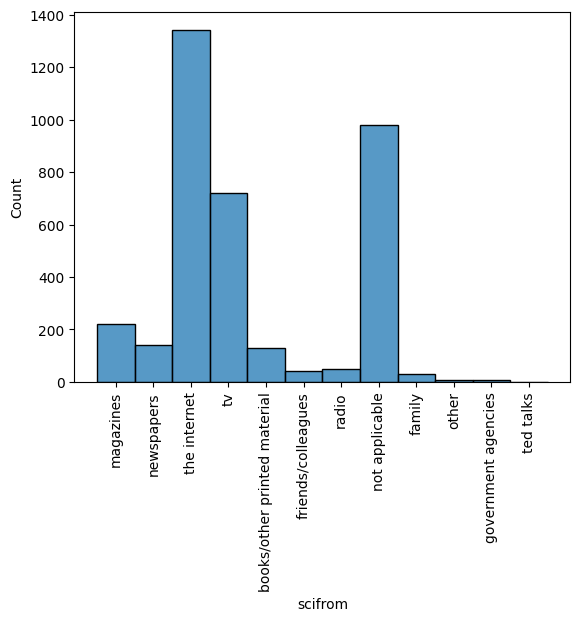

In [ ]:
category = "very interested"

inttech_scifrom_filtered = inttech_scifrom_cleaned[inttech_scifrom_cleaned["inttech"] == category]

very_interested_histplot = sns.histplot(x = "scifrom", data = inttech_scifrom_filtered)
very_interested_histplot.set_xticklabels(very_interested_histplot.get_xticklabels(), rotation = 90)

<ipython-input-37-11023665b0d4>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  very_interested_histplot.set_xticklabels(very_interested_histplot.get_xticklabels(), rotation = 90)


[Text(0, 0, 'tv'),
 Text(1, 0, 'the internet'),
 Text(2, 0, 'newspapers'),
 Text(3, 0, 'family'),
 Text(4, 0, 'magazines'),
 Text(5, 0, 'other'),
 Text(6, 0, 'books/other printed material'),
 Text(7, 0, 'radio'),
 Text(8, 0, 'not applicable'),
 Text(9, 0, 'friends/colleagues'),
 Text(10, 0, 'government agencies')]

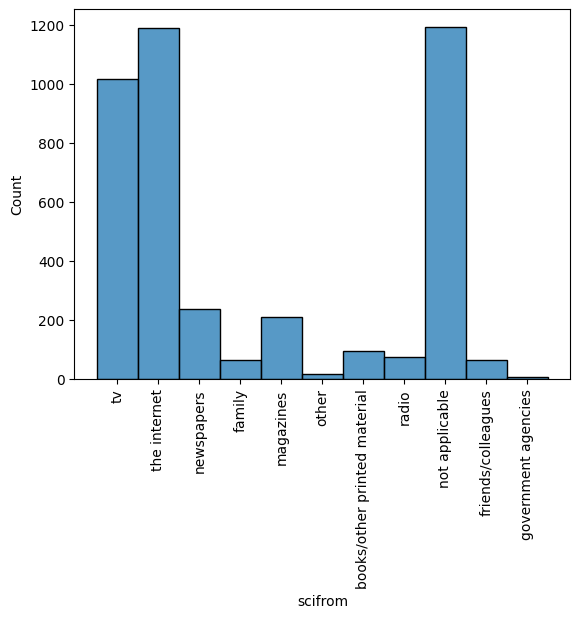

In [ ]:
category = "moderately interested"

inttech_scifrom_filtered = inttech_scifrom_cleaned[inttech_scifrom_cleaned["inttech"] == category]

very_interested_histplot = sns.histplot(x = "scifrom", data = inttech_scifrom_filtered)
very_interested_histplot.set_xticklabels(very_interested_histplot.get_xticklabels(), rotation = 90)

Using the crosstab, it seems as if those who are **moderately interested** or **very interested** primarily get their information from the internet and tv. Interestingly, there are signficantly more people who are **very interested** get their information from the **the internet** with a value $1343$ than from **tv** with a value of $721$. Yet, for those who are **moderately interested**, the number of people who get their information from **the internet** vs **tv** are roughly the same. I wonder if those who **very interested** are just on the internet all day are more technically adept so they prefer **the internet**. Only one person who was **very interested** gets their information from **ted talks**. In addition, most of the people who are **moderately interested** did not share where they got their information.  

## **useww**

## **emailmin**